<a href="https://colab.research.google.com/github/Vaycold/tensorflow_tutorial/blob/main/%236.%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9%20%EB%B0%8F%20%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the Module

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# IBDM Dataset Download

num_words = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=num_words)

def multi_hot_sequences(sequence, dimension) :
    results = np.zeros((len(sequence), dimension))
    for idx, value in enumerate(sequence) :
        results[idx, value] = 1
    return results

train_data = multi_hot_sequences(train_data, num_words)
test_data = multi_hot_sequences(test_data, num_words)      

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [42]:
train_data.shape

(25000, 1000)

    과대적합 막는 간단한 방법
     - 모델 축소
        - 학습 가능한 파라미터 수 줄이기
    

In [62]:
# Baseline Model

baseline_model = keras.Sequential([
                    keras.layers.Dense(16, activation = 'relu', input_shape = (num_words,)),
                    keras.layers.Dense(16, activation = 'relu'),
                    keras.layers.Dense(1, activation = 'sigmoid')
])

baseline_model.compile( optimizer = 'adam',
                        loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [63]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                      epochs = 20, 
                                      batch_size = 512,
                                      validation_data = (test_data, test_labels),
                                      verbose = 1)

Epoch 1/20
49/49 [==============================] - 1s 13ms/step - loss: 0.5854 - accuracy: 0.7016 - binary_crossentropy: 0.5854 - val_loss: 0.4394 - val_accuracy: 0.8108 - val_binary_crossentropy: 0.4394
Epoch 2/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3708 - accuracy: 0.8461 - binary_crossentropy: 0.3708 - val_loss: 0.3439 - val_accuracy: 0.8552 - val_binary_crossentropy: 0.3439
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3224 - accuracy: 0.8673 - binary_crossentropy: 0.3224 - val_loss: 0.3313 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3313
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3074 - accuracy: 0.8725 - binary_crossentropy: 0.3074 - val_loss: 0.3316 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3316
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3011 - accuracy: 0.8760 - binary_crossentropy: 0.3011 - val_loss: 0.3278 - val_accuracy: 0.8605 - val_binary_

In [64]:
# Small model

smaller_model = keras.Sequential([
                    keras.layers.Dense(4, activation = 'relu', input_shape = (num_words,)),
                    keras.layers.Dense(4, activation = 'relu'),
                    keras.layers.Dense(1, activation = 'sigmoid')
])

smaller_model.compile( optimizer = 'adam',
                        loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [65]:
smaller_history = baseline_model.fit(train_data, train_labels,
                                      epochs = 20, 
                                      batch_size = 512,
                                      validation_data = (test_data, test_labels),
                                      verbose = 1)

Epoch 1/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1789 - accuracy: 0.9326 - binary_crossentropy: 0.1789 - val_loss: 0.4075 - val_accuracy: 0.8439 - val_binary_crossentropy: 0.4075
Epoch 2/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1721 - accuracy: 0.9335 - binary_crossentropy: 0.1721 - val_loss: 0.4177 - val_accuracy: 0.8409 - val_binary_crossentropy: 0.4177
Epoch 3/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1660 - accuracy: 0.9388 - binary_crossentropy: 0.1660 - val_loss: 0.4331 - val_accuracy: 0.8401 - val_binary_crossentropy: 0.4331
Epoch 4/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1605 - accuracy: 0.9400 - binary_crossentropy: 0.1605 - val_loss: 0.4419 - val_accuracy: 0.8407 - val_binary_crossentropy: 0.4419
Epoch 5/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1523 - accuracy: 0.9455 - binary_crossentropy: 0.1523 - val_loss: 0.4491 - val_accuracy: 0.8391 - val_binar

In [66]:
# Large model

bigger_model = keras.Sequential([
                    keras.layers.Dense(512, activation = 'relu', input_shape = (num_words,)),
                    keras.layers.Dense(512, activation = 'relu'),
                    keras.layers.Dense(1, activation = 'sigmoid')
])

bigger_model.compile( optimizer = 'adam',
                        loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [67]:
bigger_history = baseline_model.fit(train_data, train_labels,
                                      epochs = 20, 
                                      batch_size = 512,
                                      validation_data = (test_data, test_labels),
                                      verbose = 1)

Epoch 1/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0743 - accuracy: 0.9798 - binary_crossentropy: 0.0743 - val_loss: 0.7163 - val_accuracy: 0.8250 - val_binary_crossentropy: 0.7163
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0694 - accuracy: 0.9818 - binary_crossentropy: 0.0694 - val_loss: 0.7354 - val_accuracy: 0.8232 - val_binary_crossentropy: 0.7354
Epoch 3/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0668 - accuracy: 0.9826 - binary_crossentropy: 0.0668 - val_loss: 0.7563 - val_accuracy: 0.8224 - val_binary_crossentropy: 0.7563
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0639 - accuracy: 0.9838 - binary_crossentropy: 0.0639 - val_loss: 0.7710 - val_accuracy: 0.8239 - val_binary_crossentropy: 0.7710
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0594 - accuracy: 0.9860 - binary_crossentropy: 0.0594 - val_loss: 0.7966 - val_accuracy: 0.8226 - val_binary_

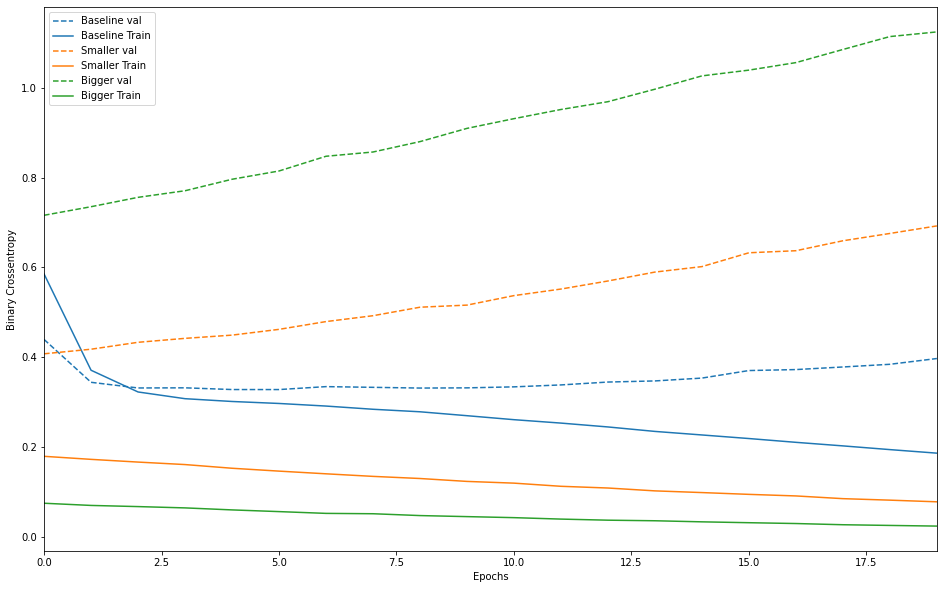

In [68]:
# Compare with 3 Model

def plot_history(histories, key='binary_crossentropy') :
    plt.figure(figsize=(16,10))

    for name, history in histories :
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label= name.title() + ' val')
        plt.plot(history.epoch, history.history[key], 
                 color = val[0].get_color(),
                 label = name.title() + ' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

    # 과대적합 방지
        - 간단한 모델은 복잡한 것 보다 과대적합이 되는 경향이 작음
        - 간단한 모델 = 파라미터의 분포 entropy가 작은 모델
          -> 가중치가 작은 값을 갖도록 복잡도에 제약 걸기 : weight decay 
        - L1 & L2 (L2가 주로 사용)
           

In [69]:
# L2 Weight decay

l2_model = keras.models.Sequential([
                keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu', input_shape = (num_words,)),
                keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'),
                keras.layers.Dense(1, activation='sigmoid')

])

l2_model.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels,
                                validation_data = (test_data, test_labels),
                                epochs = 20, 
                                batch_size = 512,
                                verbose = 1)

Epoch 1/20
49/49 [==============================] - 1s 14ms/step - loss: 0.6243 - accuracy: 0.7113 - binary_crossentropy: 0.5824 - val_loss: 0.4824 - val_accuracy: 0.8155 - val_binary_crossentropy: 0.4426
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.4163 - accuracy: 0.8444 - binary_crossentropy: 0.3767 - val_loss: 0.3900 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.3508
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3627 - accuracy: 0.8666 - binary_crossentropy: 0.3239 - val_loss: 0.3699 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3317
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3475 - accuracy: 0.8725 - binary_crossentropy: 0.3099 - val_loss: 0.3701 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3331
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3419 - accuracy: 0.8737 - binary_crossentropy: 0.3054 - val_loss: 0.3630 - val_accuracy: 0.8608 - val_binary_

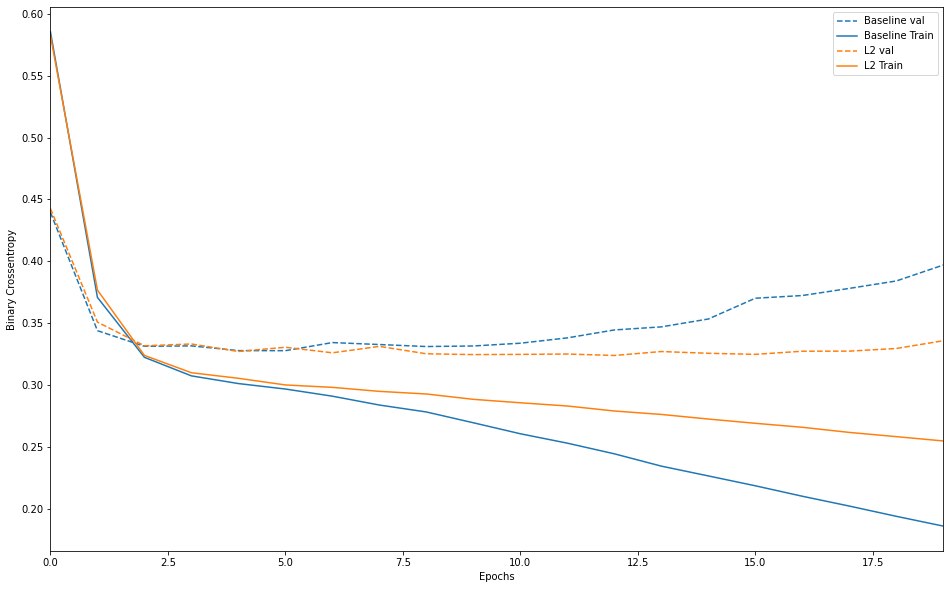

In [70]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

    # 과대적합 방지
        - 드롭아웃 추가하기
        - [0.2, 0.5, 1.3, 0.8, 1.1] -> [0, 0.5, 1.3, 0, 1.1]
        - 비율 = 0이 되는 비율
        - 주로 0.2~0.5
           

In [74]:
dpt_model = keras.models.Sequential([
                keras.layers.Dense(16, activation='relu', input_shape= (num_words,)),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(16, activation='relu'), 
                keras.layers.Dropout(0.5),
                keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy', 'binary_crossentropy'])
dpt_model_history = dpt_model.fit(train_data, train_labels,
              validation_data = (test_data, test_labels),
              epochs = 20,
              verbose = 1,
              batch_size = 512)

Epoch 1/20
49/49 [==============================] - 1s 14ms/step - loss: 0.6774 - accuracy: 0.5704 - binary_crossentropy: 0.6774 - val_loss: 0.6319 - val_accuracy: 0.7595 - val_binary_crossentropy: 0.6319
Epoch 2/20
49/49 [==============================] - 0s 10ms/step - loss: 0.5927 - accuracy: 0.7058 - binary_crossentropy: 0.5927 - val_loss: 0.5040 - val_accuracy: 0.8272 - val_binary_crossentropy: 0.5040
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.5091 - accuracy: 0.7811 - binary_crossentropy: 0.5091 - val_loss: 0.4230 - val_accuracy: 0.8437 - val_binary_crossentropy: 0.4230
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.4552 - accuracy: 0.8165 - binary_crossentropy: 0.4552 - val_loss: 0.3732 - val_accuracy: 0.8523 - val_binary_crossentropy: 0.3732
Epoch 5/20
49/49 [==============================] - 0s 8ms/step - loss: 0.4222 - accuracy: 0.8327 - binary_crossentropy: 0.4222 - val_loss: 0.3513 - val_accuracy: 0.8562 - val_binary

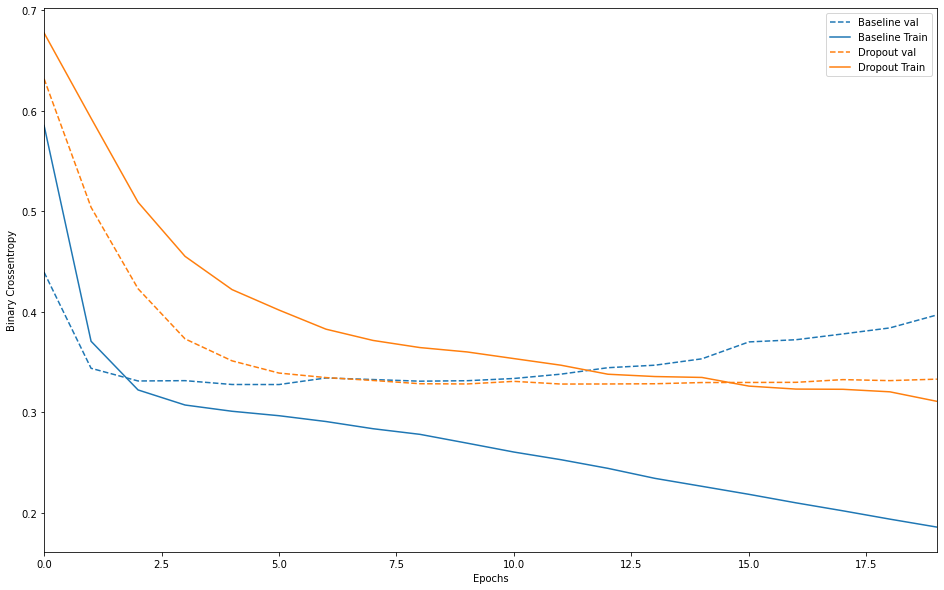

In [75]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [76]:
# Conclusion

# to avoid the overfitting
# - Gathering more data
# - Reducing the Network memories
# - Weight Decaying
# - Dropout layers